# Linear Regression using R-Squared Error and Gradient Descent

In [1]:
# importing dependencies
import pandas as pd   #to load data and modify it
import numpy as np    # for numerical calculations
import matplotlib.pyplot as plt
%matplotlib inline

 # Fit a line to Input Data
Also, we studied that to find out the "Best Fit Line" we require the values of m and b. So, to find the best fit line, we used the formula:

Slope(m) = (mean(x)mean(y) - mean(xy)) / (mean(x)^2 - mean(x^2))
Bias(b) = mean(y) - m*mean(x)
and then put these values in the equation of a straight line to get the new values for y

In [24]:
# Equation for a Straight Line:  y = mx + b
# Function to predict the Best Fit Slope
# Slope(m) = (mean(x)*mean(y) - mean(x*y))/(mean(x)^2 - mean(x^2))
# Bias(b) = mean(y) - m*mean(x)

def best_fit_slope(X,y):
    slope_m = ((mean(X)*mean(y)) - mean(X*y))/(mean(X)**2 - mean(X**2))
    bias_b = mean(y) - slope_m*mean(X)
    return slope_m, bias_b

# Load Dataset

In [25]:
# Load the data using Pandas

df = pd.read_csv('Insurane_dataset.csv')

In [26]:
# Let's have a look at the data, what it looks like, how many data points are there in the data.

print(df.head())

     X      Y
0  108  392.5
1   19   46.2
2   13   15.7
3  124  422.2
4   40  119.4


Data is in the form of two columns, X and Y. X is the total number of claims and Y represents the claims in thousands of Swedish Kronor.

In [27]:
df.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


# Scatter Plot of Input Data

In [28]:
# Load the data in the form to be input to the function for Best Fit Line

X = np.array(df['X'], dtype=np.float64)
y = np.array(df['Y'], dtype=np.float64)

Text(0.5,1,'Input Data Scatter Plot')

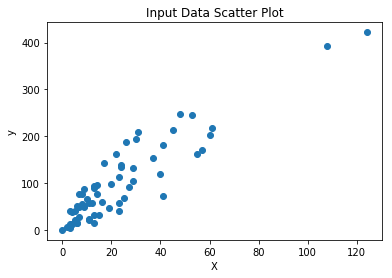

In [29]:
# Scatter Plot of the Input Data

fig,ax = plt.subplots()
ax.scatter(X,y)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Input Data Scatter Plot')

In [30]:
#Now, lets use the function we defined above and find the values for m and b to get the line that best fits the data.

m,b = best_fit_slope(X,y)

print('Slope: ',m)
print('Bias: ',b)

NameError: name 'mean' is not defined

Calculate Values of y_hat

In [31]:
# Calculate y_hat

y_hat = m*X + b

print('y_hat: ', y_hat)

NameError: name 'm' is not defined

NameError: name 'y_hat' is not defined

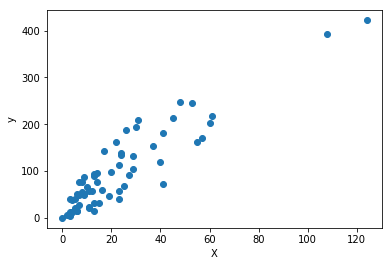

In [32]:
# Scatter Plot of the Input Data with the line fit on Input Data

fig,ax = plt.subplots()
ax.scatter(X,y)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.plot(X,y_hat)
ax.set_title('Line fit to Input Data')